# Measure "cleanliness" of insect signal datasets

In [4]:
%reset -f

import pandas as pd
import numpy as np
from wavhandler import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


### Loading one dataset

In [6]:
dname = 'Pcfruit'
d_psd = Dataset(dname)
# print("Dataset classes: {}\n".format(d_psd.target_classes));
d_psd.read(setting='psd_dB', data='D. suzukii')

Data: D. suzukii.
Read 2401 filenames in 0.06 seconds.
Loaded data into matrix in 11.89 seconds.


In [8]:
d_raw = Dataset(dname)
# print("Dataset classes: {}\n".format(d_raw.target_classes))
d_raw.read(setting='read', data='D. suzukii')

df_raw = d_raw.X.copy()

Data: D. suzukii.
Read 2401 filenames in 0.04 seconds.
Loaded data into matrix in 0.33 seconds.


#### Loading the raw signals

## Examples of clean/noisy signals

In [9]:
# plt.figure(figsize=(30,5))
# plt.subplot(1,2,1); d_raw.X.iloc[2,:].plot(ylim=(-.1,.1))
# plt.subplot(1,2,2); d_raw.X.iloc[49,:].plot(ylim=(-.1,.1)) #5817 or 5 or 1310 or 49

### Examples of clean/unclean PSDs

In [10]:
# df = d_psd.X.copy()

# plt.figure(figsize=(30,5))
# plt.subplot(1,2,1); plt.title('Example PSDs'); d_psd.X.iloc[2,:].plot(); plt.ylabel('dB')
# plt.subplot(1,2,2); d_psd.X.iloc[49,:].plot() #5817 or 5

### Calculating a feature upon which to clean data (e.g. var(PSD) or std(PSD) )

In [11]:
# d_psd.X.apply(lambda x: x.iloc[10:], axis=1).iloc[np.random.randint(0,100)].plot()#.var(), axis=1)

In [12]:
df = pd.DataFrame()
df['feat'] = d_psd.X.apply(lambda x: x.iloc[20:61].var(), axis=1)
df['feat'].sort_values(ascending=False).head()

2167    116.483517
30      112.392095
1314    109.151112
1869    105.761273
830     105.353811
Name: feat, dtype: float64

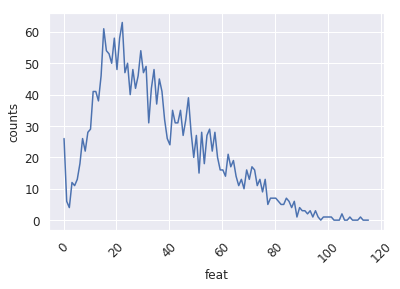

In [13]:
sub = pd.DataFrame()
sub['feat'] = df['feat']
np_hist(sub, 'feat', res=1) # sub[sub.feat>5]

2048
2401


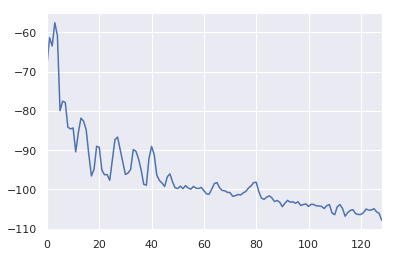

In [14]:
inds = df[(df['feat']>15) & (df['feat']<200)].index.values
sub = d_psd.X.loc[inds]
# sub = d_raw.X.loc[inds]
sub.iloc[np.random.randint(0,sub.shape[0])].plot()
print(sub.shape[0])
print(d_psd.X.shape[0])

## Selecting feat values above a high quantile as "clean"

In [21]:
clean = df[df['feat'] > df['feat'].quantile(0.9)].iloc[:,:-1]
clean_raw = df_raw.loc[clean.index]
print(clean.shape, clean_raw.shape)

(240, 0) (240, 5000)


In [16]:
df['feat'].quantile(0.95)

74.87290334360084

In [17]:
noisy = df[df['feat'] <= df['feat'].quantile(0.05)].iloc[:,:-1]
noisy_raw = df_raw.loc[noisy.index]
print(noisy.shape, noisy_raw.shape)

(121, 0) (121, 5000)


TypeError: Empty 'DataFrame': no numeric data to plot

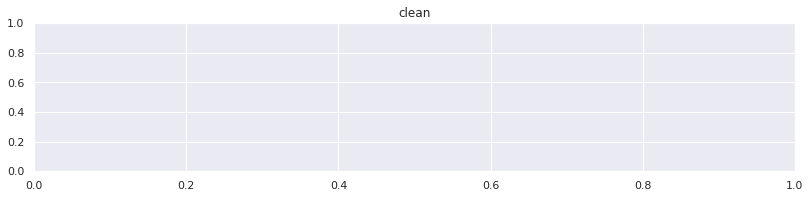

In [18]:
plt.figure(figsize=(30,6))

plt.subplot(2,2,1)
plt.title('clean')
rdm_clean = np.random.randint(0, clean.shape[0])
clean.iloc[rdm_clean,:].plot()#ylim=(-.1,.1))

plt.subplot(2,2,2)
plt.title('clean_raw')
clean_raw.iloc[rdm_clean,:].plot(ylim=(-.1,.1))

plt.subplot(2,2,3)
plt.title('noisy')
rdm_noisy = np.random.randint(0, noisy.shape[0])
plt.title('noisy')
noisy.iloc[rdm_noisy,:].plot()#ylim=(-.1,.1))

plt.subplot(2,2,4)
plt.title('noisy_raw')
noisy_raw.iloc[rdm_noisy,:].plot(ylim=(-.1,.1))

## Checking dataset distributions for selected feature (now variance)

In [ ]:
d1 = Dataset('Wingbeats')
print("Dataset classes: {}\n".format(d1.target_classes))

d1.read(setting='psd_dB', data='An. gambiae')
df = d1.X
df['feat'] = d1.X.apply(lambda x: x.var(), axis=1)

np_hist(df,'feat',res=1)
# df['feat'].hist()

In [ ]:
d1 = Dataset('Pcfruit')
print("Dataset classes: {}\n".format(d1.target_classes))

d1.read(setting='psd_dB', data='D. suzukii')
df = d1.X
df['feat'] = d1.X.apply(lambda x: x.var(), axis=1)

np_hist(df,'feat',res=1)
# df['feat'].hist()

In [ ]:
d1 = Dataset('Thomas')
print("Dataset classes: {}\n".format(d1.target_classes))

d1.read(setting='psd_dB', data='Melanogaster')
df = d1.X
df['feat'] = d1.X.apply(lambda x: x.var(), axis=1)

np_hist(df,'feat',res=1)
# df['feat'].hist()

#### Examining the second peak

In [ ]:
inds = df[(df['feat']>25) & (df['feat']<30)].index.values
d1.get_sensor_features()

In [ ]:
d1.df_features.loc[inds].hist(figsize=(20,6))

#### Raw signal vs Difference series

In [ ]:
rdm = np.random.randint(0,df_raw.shape[0])
sig = df_raw.iloc[rdm,:]
plt.figure(figsize=(30,4))
plt.subplot(1,2,1); sig.plot(ylim=(-.1,.1))
plt.title("{:.3f} _ {:.3f}".format(sig.std(), sig.diff().std()))
plt.subplot(1,2,2); sig.diff().plot(ylim=(-.1,.1))

In [ ]:
# # dataset.overview()
# df = dataset.X
# sub = pd.DataFrame()
# sub['diff_std'] = df.apply(lambda x: x.diff().std(), axis=1)
# sub['max'] = dataset.X.max(axis=1)
# sub['min'] = dataset.X.min(axis=1)
# sub.head()

# New Sensor by Insectronics (Potamitis)

In [ ]:
from IPython.display import Image
PATH = "./temp_data/new_sensor.png"
Image(filename = PATH, width=300, height=50)

In [ ]:
dataset = Dataset('new_sensor')
dataset.read(setting='read', data='D190502153507')

df = dataset.X

rdm = np.random.randint(0,df.shape[0])
plt.figure(figsize=(40,14))
plt.subplot(2,2,1); plt.title('raw signal');
sig = df.iloc[rdm,:]
sig.plot()
plt.subplot(2,2,2); plt.title('after bandpass filter');
plt.ylim(-.025,.025)
plt.plot(butter_bandpass_filter(sig, L_CUTOFF,H_CUTOFF,F_S,B_ORDER))
plt.subplot(2,2,3); plt.title('PSD (eucl normalized)')
f = power_spectral_density(sig)
plt.plot(f.frequency, f.pow_amp)
plt.subplot(2,2,4); plt.title('PSD log values ')
plt.plot(transform_data(sig.values))

In [ ]:
dataset2 = Dataset('Thomas')
dataset2.read(setting='read', data='Suzukii')

df2 = dataset2.X
rdm = 5817#np.random.randint(0,df2.shape[0])
print(rdm)
plt.figure(figsize=(40,14))
plt.subplot(2,2,1)
sig = df2.iloc[rdm,:]
sig.plot()
plt.subplot(2,2,2)
plt.ylim(-0.025,.025)
plt.plot(butter_bandpass_filter(sig, L_CUTOFF,H_CUTOFF,F_S,B_ORDER))
plt.subplot(2,2,3)
f = power_spectral_density(sig)
plt.plot(f.frequency, f.pow_amp)
plt.subplot(2,2,4)
plt.plot(transform_data(sig.values))

In [ ]:
# inds = (sub['diff_std'] > 0.003).astype(int).values
# df = df.iloc[inds,:]
# y = dataset.y[inds]
# df.iloc[5,:].plot()

## Neural Net trained on Thomas dataset (92.5% test-acc)

In [ ]:
from utils_train import make_classification_ml, make_classification_conv1d

data = Dataset('thomas')
data.read(setting='psd', labels='nr')
make_classification_conv1d(data.X, data.y, )